In [14]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
# Step 2: Upload and Load Data
from google.colab import files
uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

Saving Housing.csv to Housing (1).csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
# Step 3: Encode Categorical Variables
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
# Step 4: Define Features and Target
X = df.drop(columns=['price'])
y = df['price']

In [18]:
# Step 5: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Step 6: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Step 7: Make Predictions and Evaluate
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 979679.6912959901
Mean Squared Error (MSE): 1771751116594.0352
R² Score: 0.6494754192267803


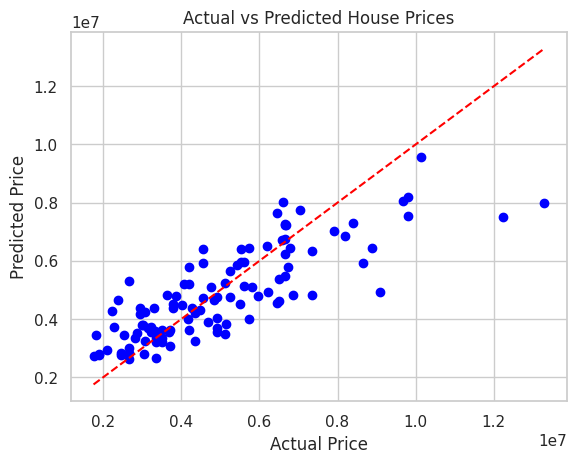

In [21]:
# Step 8: Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()